# Your info

Full name: Melika Nobakhtian

Student ID: 97522094

# Q2

In [41]:
# Q2_graded
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras import regularizers
import math
from skimage.util import random_noise
from skimage.filters import threshold_mean
import csv
import pandas as pd
from skimage.transform import resize

In [42]:
# Q2_graded
# Do not change the above line.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


**Select 10 images randomly from different classes of MNIST Fasshion**

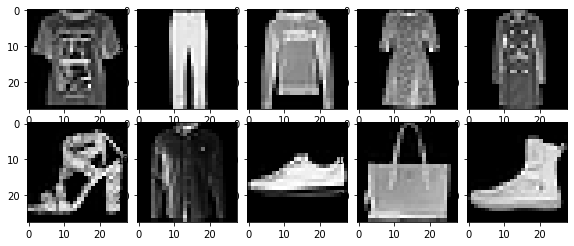

In [43]:
# Q2_graded
fig, axeslist = plt.subplots(ncols=5, nrows=2, figsize=(15,15))
images_to_train = []
plt.subplots_adjust(wspace=0.1, hspace=0.1, left=0, right=0.5, bottom=0, top=0.2)

## T-shirt/top
idx_0 = np.where( y_train == 0 )[0]
rand_idx = idx_0[np.random.randint(0, len(idx_0))]
images_to_train.append(x_train[rand_idx])
axeslist[0][0].imshow(images_to_train[0], cmap='gray')

## Trouser
idx_1 = np.where( y_train == 1 )[0]
rand_idx = idx_1[np.random.randint(0, len(idx_1))]
images_to_train.append(x_train[rand_idx])
axeslist[0][1].imshow(images_to_train[1],  cmap='gray')

## Pullover
idx_2 = np.where( y_train == 2 )[0]
rand_idx = idx_2[np.random.randint(0, len(idx_2))]
images_to_train.append(x_train[rand_idx])
axeslist[0][2].imshow(images_to_train[2],  cmap='gray')

## Dress
idx_3 = np.where( y_train ==3 )[0]
rand_idx = idx_3[np.random.randint(0, len(idx_3))]
images_to_train.append(x_train[rand_idx])
axeslist[0][3].imshow(images_to_train[3],  cmap='gray')

## Coat
idx_4 = np.where( y_train == 4 )[0]
rand_idx = idx_4[np.random.randint(0, len(idx_4))]
images_to_train.append(x_train[rand_idx])
axeslist[0][4].imshow(images_to_train[4],  cmap='gray')

## Sandal
idx_5 = np.where( y_train == 5 )[0]
rand_idx = idx_5[np.random.randint(0, len(idx_5))]
images_to_train.append(x_train[rand_idx])
axeslist[1][0].imshow(images_to_train[5],  cmap='gray')

## 	Shirt
idx_6 = np.where( y_train == 6 )[0]
rand_idx = idx_6[np.random.randint(0, len(idx_6))]
images_to_train.append(x_train[rand_idx])
axeslist[1][1].imshow(images_to_train[6],  cmap='gray')

## Sneaker
idx_7 = np.where( y_train == 7 )[0]
rand_idx = idx_7[np.random.randint(0, len(idx_7))]
images_to_train.append(x_train[rand_idx])
axeslist[1][2].imshow(images_to_train[7],  cmap='gray') 

## Bag
idx_8 = np.where( y_train == 8 )[0]
rand_idx = idx_8[np.random.randint(0, len(idx_8))]
images_to_train.append(x_train[rand_idx])
axeslist[1][3].imshow(images_to_train[8],  cmap='gray')

## Ankle boot
idx_9 = np.where( y_train == 9 )[0]
rand_idx = idx_9[np.random.randint(0, len(idx_9))]
images_to_train.append(x_train[rand_idx])
axeslist[1][4].imshow(images_to_train[9],  cmap='gray')

# Hopfield Class

In [44]:
# Q2_graded
class Hopfield:

  def __init__(self, input_shape): 
    self.num_neurons = input_shape[0] * input_shape[1]
    self.W = np.zeros((self.num_neurons , self.num_neurons))

  def preprocess_image(self, img):
    img_mean = threshold_mean(img)
    img = np.where(img < img_mean, -1, 1)
    img = img.flatten()

    return img

  def init_weights_with_patterns(self, train_data):
    for data in train_data:
      data = self.preprocess_image(data)
      for i in range(self.num_neurons):
            for j in range(i, self.num_neurons):
                if i != j:
                    w_ij = data[i] * data[j]
                    self.W[i][j] += w_ij
                    self.W[j][i] += w_ij                  
                else:
                    self.W[i][j] = 0

  def energy_function(self, S):
      return -0.5 * np.matmul(np.matmul(S.T,self.W), S)

  def retrieve_pattern(self, pattern, iterations, Async=False, Async_Iter=200):
    new_pattern = self.preprocess_image(pattern)

    if Async == False:

      energy = self.energy_function(new_pattern)

      for i in range(iterations):

        new_pattern = np.sign(np.matmul(self.W, new_pattern))
        new_energy = self.energy_function(new_pattern)

        if energy == new_energy:
          return new_pattern

        energy = new_energy

      return new_pattern

    else:

      energy = self.energy_function(new_pattern)

      for i in range(iterations):
        for j in range(Async_Iter):

          random_neuron = np.random.randint(0, self.num_neurons)
          new_pattern[random_neuron] = np.sign(np.matmul(self.W[random_neuron], new_pattern))

        new_energy = self.energy_function(new_pattern)

        if energy == new_energy:
          return new_pattern

        energy = new_energy

      return new_pattern

## Hopfield Network with input shape (28,28) - 784 neuron

In [45]:
# Q2_graded
hopnet_1 = Hopfield((28, 28))
hopnet_1.init_weights_with_patterns(images_to_train)

**Add %10 noise to train images**

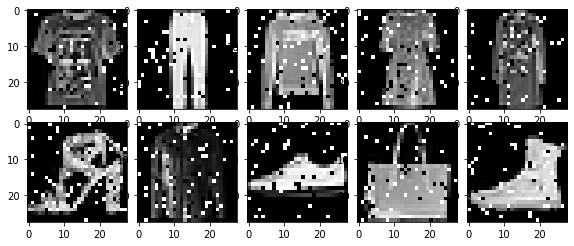

In [46]:
# Q2_graded
# plot noisy images
fig, axeslist = plt.subplots(ncols=5, nrows=2, figsize=(15,15))
noisy_images = []
plt.subplots_adjust(wspace=0.1, hspace=0.1, left=0, right=0.5, bottom=0, top=0.2)

# add noise
for img in images_to_train:
  noise_img = random_noise(img , mode='s&p',amount=0.1)
  noisy_images.append(noise_img)

# show images with %10 noise
idx = 0
for i in range(2):
  for j in range(5):
    axeslist[i][j].imshow(noisy_images[idx],  cmap='gray')
    idx += 1

**Predict noisy images**

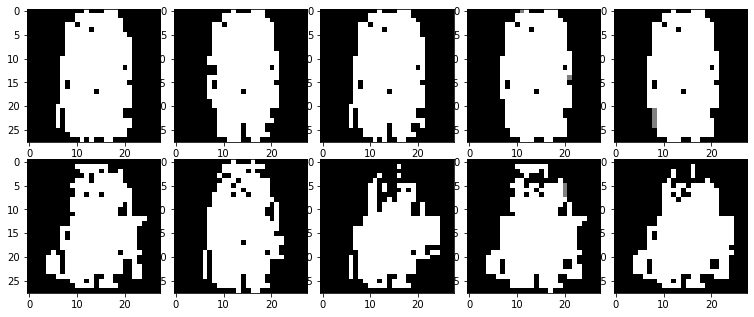

In [47]:
# Q2_graded
predicted_images = []
for img in noisy_images:
  new_img = hopnet_1.retrieve_pattern(img, 2)
  predicted_images.append(new_img)

# plot main image and predicted one
fig, axeslist = plt.subplots(ncols=5, nrows=2, figsize=(20,20))
plt.subplots_adjust(wspace=0.1, hspace=0.1, left=0, right=0.5, bottom=0, top=0.2)

idx = 0
for i in range(2):
  for j in range(5):
    axeslist[i][j].imshow(np.reshape(predicted_images[idx], (28, 28)),  cmap='gray')
    idx += 1

**Compute Accuracy per image and for all images**

In [48]:
# Q2_graded
idx = 0
avg_acc = 0
for pre , org in zip(predicted_images, images_to_train):
  org_binary = hopnet_1.preprocess_image(org)
  same_pixels = np.sum(org_binary == pre)
  avg_acc += (same_pixels / 784 )
  print(f'image {idx+1} accuracy : {same_pixels / 784 }')
  idx += 1

## Average Accuracy
print('')
print("** Average Accuracy ** ")
print(f'Acc: {avg_acc / 10}')

image 1 accuracy : 0.7423469387755102
image 2 accuracy : 0.8877551020408163
image 3 accuracy : 0.7908163265306123
image 4 accuracy : 0.9081632653061225
image 5 accuracy : 0.9630102040816326
image 6 accuracy : 0.7551020408163265
image 7 accuracy : 0.7423469387755102
image 8 accuracy : 0.7806122448979592
image 9 accuracy : 0.7767857142857143
image 10 accuracy : 0.8137755102040817

** Average Accuracy ** 
Acc: 0.8160714285714287


**Add %30 noise to train images**

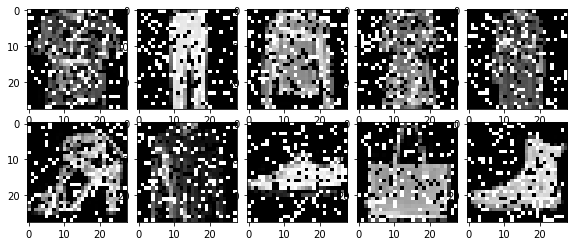

In [49]:
# Q2_graded
# plot noisy images
fig, axeslist = plt.subplots(ncols=5, nrows=2, figsize=(15,15))
noisy_images = []
plt.subplots_adjust(wspace=0.1, hspace=0.1, left=0, right=0.5, bottom=0, top=0.2)

# add noise
for img in images_to_train:
  noise_img = random_noise(img , mode='s&p',amount=0.3)
  noisy_images.append(noise_img)

# show images with %30 noise
idx = 0
for i in range(2):
  for j in range(5):
    axeslist[i][j].imshow(noisy_images[idx],  cmap='gray')
    idx += 1

**Predict noisy images**

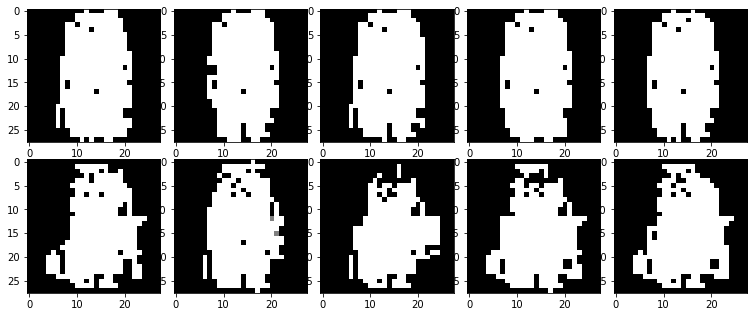

In [50]:
# Q2_graded
predicted_images = []
for img in noisy_images:
  new_img = hopnet_1.retrieve_pattern(img, 2)
  predicted_images.append(new_img)

# plot main image and predicted one
fig, axeslist = plt.subplots(ncols=5, nrows=2, figsize=(20,20))
plt.subplots_adjust(wspace=0.1, hspace=0.1, left=0, right=0.5, bottom=0, top=0.2)

idx = 0
for i in range(2):
  for j in range(5):
    axeslist[i][j].imshow(np.reshape(predicted_images[idx], (28, 28)),  cmap='gray')
    idx += 1

**Compute Accuracy per image and for all images**

In [51]:
# Q2_graded
idx = 0
avg_acc = 0
for pre , org in zip(predicted_images, images_to_train):
  org_binary = hopnet_1.preprocess_image(org)
  same_pixels = np.sum(org_binary == pre)
  avg_acc += (same_pixels / 784 )
  print(f'image {idx+1} accuracy : {same_pixels / 784 }')
  idx += 1

## Average Accuracy
print('')
print("** Average Accuracy ** ")
print(f'Acc: {avg_acc / 10}')

image 1 accuracy : 0.7372448979591837
image 2 accuracy : 0.8877551020408163
image 3 accuracy : 0.7920918367346939
image 4 accuracy : 0.9056122448979592
image 5 accuracy : 0.9553571428571429
image 6 accuracy : 0.7614795918367347
image 7 accuracy : 0.7283163265306123
image 8 accuracy : 0.7627551020408163
image 9 accuracy : 0.7818877551020408
image 10 accuracy : 0.7678571428571429

** Average Accuracy ** 
Acc: 0.8080357142857144


**Add %60 noise to train images**

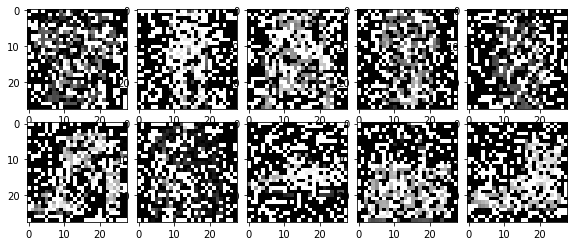

In [52]:
# Q2_graded
# plot noisy images
fig, axeslist = plt.subplots(ncols=5, nrows=2, figsize=(15,15))
noisy_images = []
plt.subplots_adjust(wspace=0.1, hspace=0.1, left=0, right=0.5, bottom=0, top=0.2)

# add noise
for img in images_to_train:
  noise_img = random_noise(img , mode='s&p',amount=0.6)
  noisy_images.append(noise_img)

# show images with %60 noise
idx = 0
for i in range(2):
  for j in range(5):
    axeslist[i][j].imshow(noisy_images[idx],  cmap='gray')
    idx += 1

**Predict noisy images**

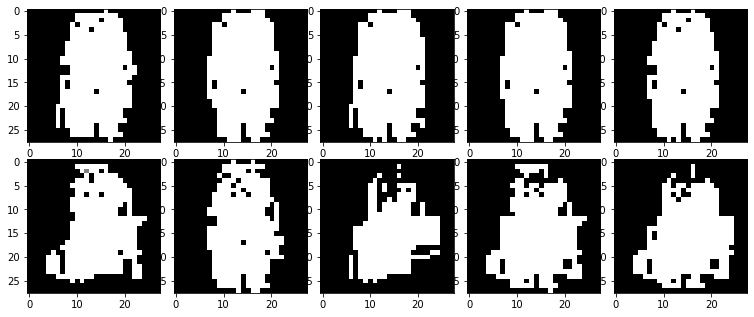

In [53]:
# Q2_graded
predicted_images = []
for img in noisy_images:
  new_img = hopnet_1.retrieve_pattern(img, 2)
  predicted_images.append(new_img)

# plot main image and predicted one
fig, axeslist = plt.subplots(ncols=5, nrows=2, figsize=(20,20))
plt.subplots_adjust(wspace=0.1, hspace=0.1, left=0, right=0.5, bottom=0, top=0.2)

idx = 0
for i in range(2):
  for j in range(5):
    axeslist[i][j].imshow(np.reshape(predicted_images[idx], (28, 28)),  cmap='gray')
    idx += 1

**Compute Accuracy per image and for all images**

In [54]:
# Q2_graded
idx = 0
avg_acc = 0
for pre , org in zip(predicted_images, images_to_train):
  org_binary = hopnet_1.preprocess_image(org)
  same_pixels = np.sum(org_binary == pre)
  avg_acc += (same_pixels / 784 )
  print(f'image {idx+1} accuracy : {same_pixels / 784 }')
  idx += 1

## Average Accuracy
print('')
print("** Average Accuracy ** ")
print(f'Acc: {avg_acc / 10}')

image 1 accuracy : 0.7232142857142857
image 2 accuracy : 0.8826530612244898
image 3 accuracy : 0.7920918367346939
image 4 accuracy : 0.8992346938775511
image 5 accuracy : 0.9400510204081632
image 6 accuracy : 0.7793367346938775
image 7 accuracy : 0.7283163265306123
image 8 accuracy : 0.8099489795918368
image 9 accuracy : 0.7716836734693877
image 10 accuracy : 0.8150510204081632

** Average Accuracy ** 
Acc: 0.8141581632653059


## Hopfield Network with input shape (20,20) - 400 neuron

**Resize Images**

In [55]:
# Q2_graded
train_20 = []
for img in images_to_train:
  resized_img = resize(img, (20, 20))
  train_20.append(resized_img)

In [56]:
# Q2_graded
hopnet_2 = Hopfield((20, 20))
hopnet_2.init_weights_with_patterns(train_20)

**Add %10 noise to train images**

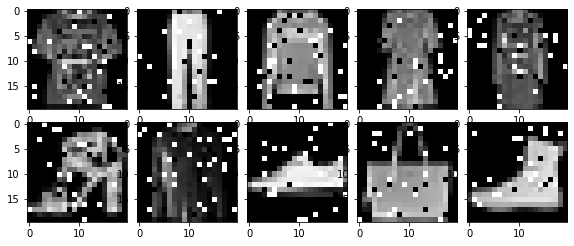

In [57]:
# Q2_graded
# plot noisy images
fig, axeslist = plt.subplots(ncols=5, nrows=2, figsize=(15,15))
noisy_images = []
plt.subplots_adjust(wspace=0.1, hspace=0.1, left=0, right=0.5, bottom=0, top=0.2)

# add noise
for img in train_20:
  noise_img = random_noise(img , mode='s&p',amount=0.1)
  noisy_images.append(noise_img)

# show images with %10 noise
idx = 0
for i in range(2):
  for j in range(5):
    axeslist[i][j].imshow(noisy_images[idx],  cmap='gray')
    idx += 1

**Predict noisy images**

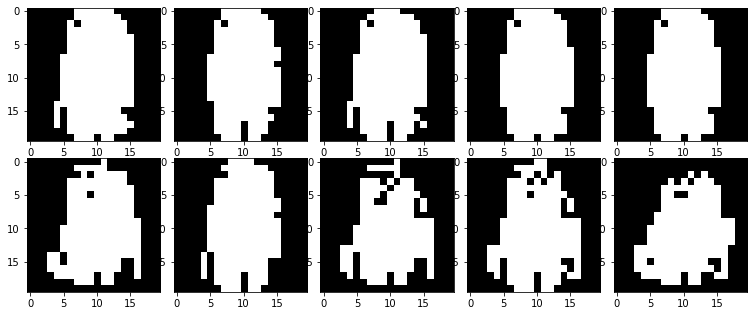

In [58]:
# Q2_graded
predicted_images = []
for img in noisy_images:
  new_img = hopnet_2.retrieve_pattern(img, 2)
  predicted_images.append(new_img)

# plot main image and predicted one
fig, axeslist = plt.subplots(ncols=5, nrows=2, figsize=(20,20))
plt.subplots_adjust(wspace=0.1, hspace=0.1, left=0, right=0.5, bottom=0, top=0.2)

idx = 0
for i in range(2):
  for j in range(5):
    axeslist[i][j].imshow(np.reshape(predicted_images[idx], (20, 20)),  cmap='gray')
    idx += 1

**Compute Accuracy per image and for all images**

In [59]:
# Q2_graded
idx = 0
avg_acc = 0
for pre , org in zip(predicted_images, train_20):
  org_binary = hopnet_2.preprocess_image(org)
  same_pixels = np.sum(org_binary == pre)
  avg_acc += (same_pixels / 400 )
  print(f'image {idx+1} accuracy : {same_pixels / 400 }')
  idx += 1

## Average Accuracy
print('')
print("** Average Accuracy ** ")
print(f'Acc: {avg_acc / 10}')

image 1 accuracy : 0.76
image 2 accuracy : 0.875
image 3 accuracy : 0.81
image 4 accuracy : 0.9
image 5 accuracy : 0.9875
image 6 accuracy : 0.7475
image 7 accuracy : 0.75
image 8 accuracy : 0.7175
image 9 accuracy : 0.7475
image 10 accuracy : 0.81

** Average Accuracy ** 
Acc: 0.8105


**Add %30 noise to train images**

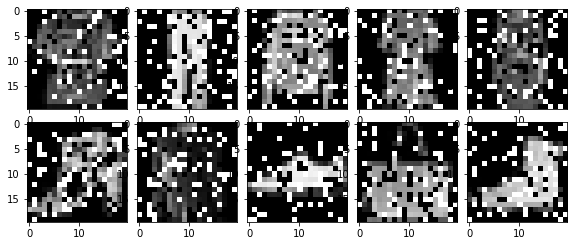

In [60]:
# Q2_graded
# plot noisy images
fig, axeslist = plt.subplots(ncols=5, nrows=2, figsize=(15,15))
noisy_images = []
plt.subplots_adjust(wspace=0.1, hspace=0.1, left=0, right=0.5, bottom=0, top=0.2)

# add noise
for img in train_20:
  noise_img = random_noise(img , mode='s&p',amount=0.3)
  noisy_images.append(noise_img)

# show images with %30 noise
idx = 0
for i in range(2):
  for j in range(5):
    axeslist[i][j].imshow(noisy_images[idx],  cmap='gray')
    idx += 1

**Predict noisy images**

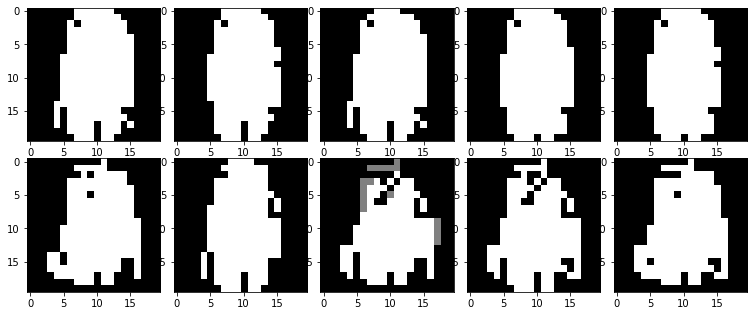

In [61]:
# Q2_graded
predicted_images = []
for img in noisy_images:
  new_img = hopnet_2.retrieve_pattern(img, 2)
  predicted_images.append(new_img)

# plot main image and predicted one
fig, axeslist = plt.subplots(ncols=5, nrows=2, figsize=(20,20))
plt.subplots_adjust(wspace=0.1, hspace=0.1, left=0, right=0.5, bottom=0, top=0.2)

idx = 0
for i in range(2):
  for j in range(5):
    axeslist[i][j].imshow(np.reshape(predicted_images[idx], (20, 20)),  cmap='gray')
    idx += 1

**Compute Accuracy per image and for all images**

In [62]:
# Q2_graded
idx = 0
avg_acc = 0
for pre , org in zip(predicted_images, train_20):
  org_binary = hopnet_2.preprocess_image(org)
  same_pixels = np.sum(org_binary == pre)
  avg_acc += (same_pixels / 400 )
  print(f'image {idx+1} accuracy : {same_pixels / 400 }')
  idx += 1

## Average Accuracy
print('')
print("** Average Accuracy ** ")
print(f'Acc: {avg_acc / 10}')

image 1 accuracy : 0.75
image 2 accuracy : 0.875
image 3 accuracy : 0.81
image 4 accuracy : 0.9
image 5 accuracy : 0.985
image 6 accuracy : 0.7475
image 7 accuracy : 0.765
image 8 accuracy : 0.7175
image 9 accuracy : 0.7575
image 10 accuracy : 0.755

** Average Accuracy ** 
Acc: 0.8062500000000001


**Add %60 noise to train images**

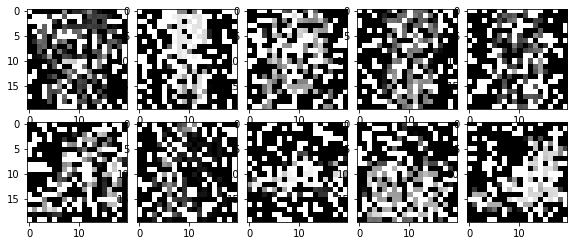

In [63]:
# Q2_graded
# plot noisy images
fig, axeslist = plt.subplots(ncols=5, nrows=2, figsize=(15,15))
noisy_images = []
plt.subplots_adjust(wspace=0.1, hspace=0.1, left=0, right=0.5, bottom=0, top=0.2)

# add noise
for img in train_20:
  noise_img = random_noise(img , mode='s&p',amount=0.6)
  noisy_images.append(noise_img)

# show images with %60 noise
idx = 0
for i in range(2):
  for j in range(5):
    axeslist[i][j].imshow(noisy_images[idx],  cmap='gray')
    idx += 1

**Predict noisy images**

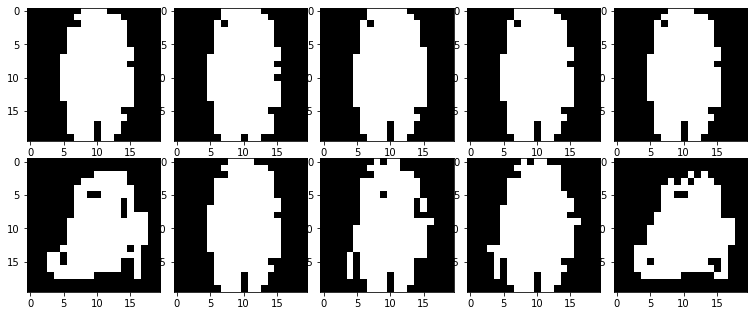

In [64]:
# Q2_graded
predicted_images = []
for img in noisy_images:
  new_img = hopnet_2.retrieve_pattern(img, 2)
  predicted_images.append(new_img)

# plot main image and predicted one
fig, axeslist = plt.subplots(ncols=5, nrows=2, figsize=(20,20))
plt.subplots_adjust(wspace=0.1, hspace=0.1, left=0, right=0.5, bottom=0, top=0.2)

idx = 0
for i in range(2):
  for j in range(5):
    axeslist[i][j].imshow(np.reshape(predicted_images[idx], (20, 20)),  cmap='gray')
    idx += 1

**Compute Accuracy per image and for all images**

In [65]:
# Q2_graded
idx = 0
avg_acc = 0
for pre , org in zip(predicted_images, train_20):
  org_binary = hopnet_2.preprocess_image(org)
  same_pixels = np.sum(org_binary == pre)
  avg_acc += (same_pixels / 400 )
  print(f'image {idx+1} accuracy : {same_pixels / 400 }')
  idx += 1

## Average Accuracy
print('')
print("** Average Accuracy ** ")
print(f'Acc: {avg_acc / 10}')

image 1 accuracy : 0.72
image 2 accuracy : 0.8675
image 3 accuracy : 0.7975
image 4 accuracy : 0.895
image 5 accuracy : 0.9775
image 6 accuracy : 0.835
image 7 accuracy : 0.7375
image 8 accuracy : 0.6725
image 9 accuracy : 0.685
image 10 accuracy : 0.8275

** Average Accuracy ** 
Acc: 0.8015000000000001


## Hopfield Network with input shape (32,32) - 1024 neuron

In [66]:
# Q2_graded
train_32 = []
for img in images_to_train:
  resized_img = resize(img, (32, 32))
  train_32.append(resized_img)

In [67]:
# Q2_graded
hopnet_3 = Hopfield((32, 32))
hopnet_3.init_weights_with_patterns(train_32)

**Add %10 noise to train images**

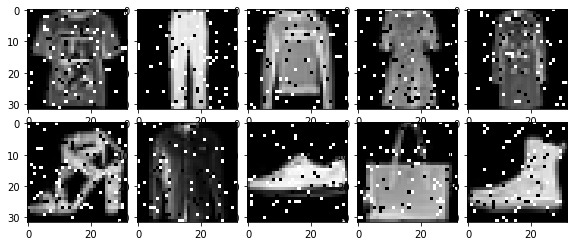

In [68]:
# Q2_graded
# plot noisy images
fig, axeslist = plt.subplots(ncols=5, nrows=2, figsize=(15,15))
noisy_images = []
plt.subplots_adjust(wspace=0.1, hspace=0.1, left=0, right=0.5, bottom=0, top=0.2)

# add noise
for img in train_32:
  noise_img = random_noise(img , mode='s&p',amount=0.1)
  noisy_images.append(noise_img)

# show images with %10 noise
idx = 0
for i in range(2):
  for j in range(5):
    axeslist[i][j].imshow(noisy_images[idx],  cmap='gray')
    idx += 1

**Predict noisy images**



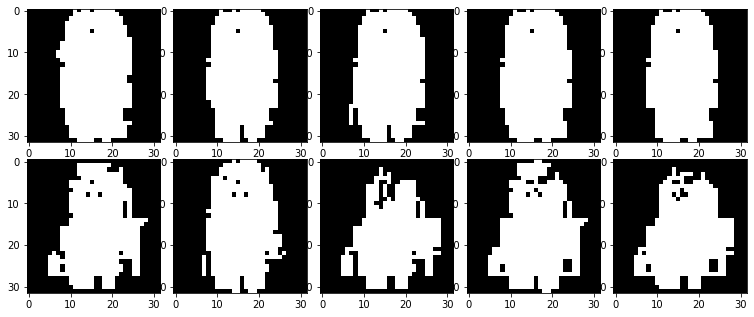

In [69]:
# Q2_graded
predicted_images = []
for img in noisy_images:
  new_img = hopnet_3.retrieve_pattern(img, 2)
  predicted_images.append(new_img)

# plot main image and predicted one
fig, axeslist = plt.subplots(ncols=5, nrows=2, figsize=(20,20))
plt.subplots_adjust(wspace=0.1, hspace=0.1, left=0, right=0.5, bottom=0, top=0.2)

idx = 0
for i in range(2):
  for j in range(5):
    axeslist[i][j].imshow(np.reshape(predicted_images[idx], (32, 32)),  cmap='gray')
    idx += 1

**Compute Accuracy per image and for all images**

In [70]:
# Q2_graded
idx = 0
avg_acc = 0
for pre , org in zip(predicted_images, train_32):
  org_binary = hopnet_3.preprocess_image(org)
  same_pixels = np.sum(org_binary == pre)
  avg_acc += (same_pixels / 1024 )
  print(f'image {idx+1} accuracy : {same_pixels / 1024 }')
  idx += 1

## Average Accuracy
print('')
print("** Average Accuracy ** ")
print(f'Acc: {avg_acc / 10}')

image 1 accuracy : 0.7724609375
image 2 accuracy : 0.8818359375
image 3 accuracy : 0.796875
image 4 accuracy : 0.9150390625
image 5 accuracy : 0.9873046875
image 6 accuracy : 0.7529296875
image 7 accuracy : 0.7236328125
image 8 accuracy : 0.7431640625
image 9 accuracy : 0.7431640625
image 10 accuracy : 0.791015625

** Average Accuracy ** 
Acc: 0.8107421875


**Add %30 noise to train images**

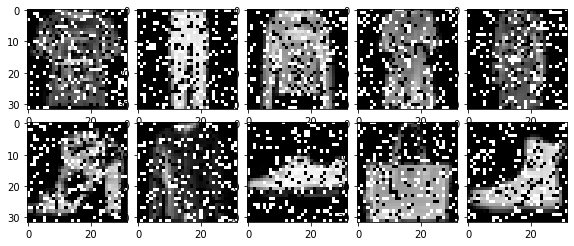

In [71]:
# Q2_graded
# plot noisy images
fig, axeslist = plt.subplots(ncols=5, nrows=2, figsize=(15,15))
noisy_images = []
plt.subplots_adjust(wspace=0.1, hspace=0.1, left=0, right=0.5, bottom=0, top=0.2)

# add noise
for img in train_32:
  noise_img = random_noise(img , mode='s&p',amount=0.3)
  noisy_images.append(noise_img)

# show images with %30 noise
idx = 0
for i in range(2):
  for j in range(5):
    axeslist[i][j].imshow(noisy_images[idx],  cmap='gray')
    idx += 1

**Predict noisy images**

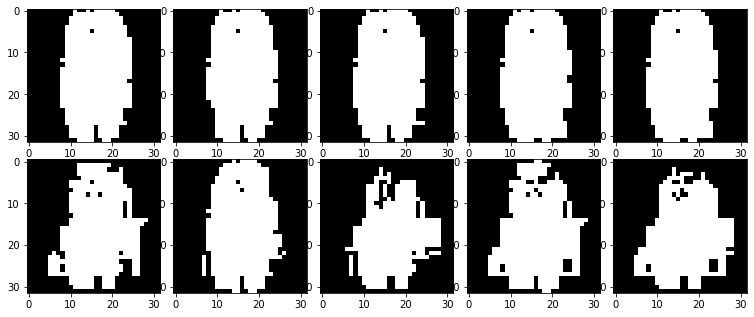

In [72]:
# Q2_graded
predicted_images = []
for img in noisy_images:
  new_img = hopnet_3.retrieve_pattern(img, 2)
  predicted_images.append(new_img)

# plot main image and predicted one
fig, axeslist = plt.subplots(ncols=5, nrows=2, figsize=(20,20))
plt.subplots_adjust(wspace=0.1, hspace=0.1, left=0, right=0.5, bottom=0, top=0.2)

idx = 0
for i in range(2):
  for j in range(5):
    axeslist[i][j].imshow(np.reshape(predicted_images[idx], (32, 32)),  cmap='gray')
    idx += 1

**Compute Accuracy per image and for all images**

In [73]:
# Q2_graded
idx = 0
avg_acc = 0
for pre , org in zip(predicted_images, train_32):
  org_binary = hopnet_3.preprocess_image(org)
  same_pixels = np.sum(org_binary == pre)
  avg_acc += (same_pixels / 1024 )
  print(f'image {idx+1} accuracy : {same_pixels / 1024 }')
  idx += 1

## Average Accuracy
print('')
print("** Average Accuracy ** ")
print(f'Acc: {avg_acc / 10}')

image 1 accuracy : 0.75390625
image 2 accuracy : 0.8818359375
image 3 accuracy : 0.7919921875
image 4 accuracy : 0.9169921875
image 5 accuracy : 0.9833984375
image 6 accuracy : 0.7529296875
image 7 accuracy : 0.7177734375
image 8 accuracy : 0.763671875
image 9 accuracy : 0.7431640625
image 10 accuracy : 0.7919921875

** Average Accuracy ** 
Acc: 0.809765625


**Add %60 noise to train images**

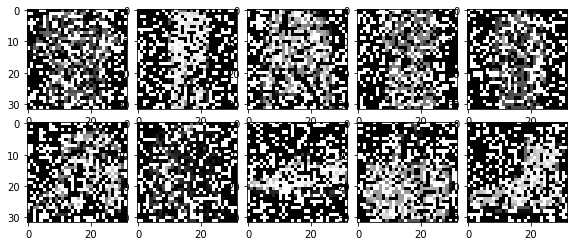

In [74]:
# Q2_graded
# plot noisy images
fig, axeslist = plt.subplots(ncols=5, nrows=2, figsize=(15,15))
noisy_images = []
plt.subplots_adjust(wspace=0.1, hspace=0.1, left=0, right=0.5, bottom=0, top=0.2)

# add noise
for img in train_32:
  noise_img = random_noise(img , mode='s&p',amount=0.6)
  noisy_images.append(noise_img)

# show images with %60 noise
idx = 0
for i in range(2):
  for j in range(5):
    axeslist[i][j].imshow(noisy_images[idx],  cmap='gray')
    idx += 1

**Predict noisy images**

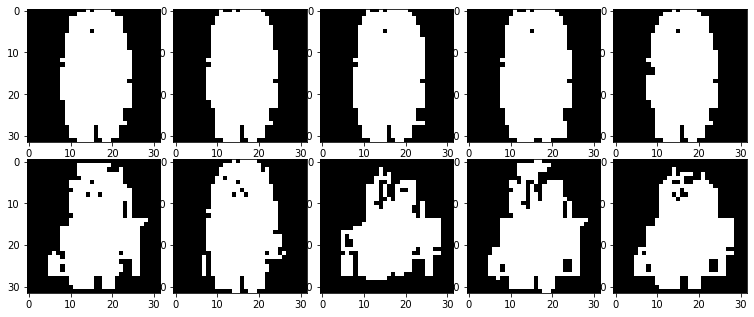

In [75]:
# Q2_graded
predicted_images = []
for img in noisy_images:
  new_img = hopnet_3.retrieve_pattern(img, 2)
  predicted_images.append(new_img)

# plot main image and predicted one
fig, axeslist = plt.subplots(ncols=5, nrows=2, figsize=(20,20))
plt.subplots_adjust(wspace=0.1, hspace=0.1, left=0, right=0.5, bottom=0, top=0.2)

idx = 0
for i in range(2):
  for j in range(5):
    axeslist[i][j].imshow(np.reshape(predicted_images[idx], (32, 32)),  cmap='gray')
    idx += 1

**Compute Accuracy per image and for all images**

In [76]:
# Q2_graded
idx = 0
avg_acc = 0
for pre , org in zip(predicted_images, train_32):
  org_binary = hopnet_3.preprocess_image(org)
  same_pixels = np.sum(org_binary == pre)
  avg_acc += (same_pixels / 1024 )
  print(f'image {idx+1} accuracy : {same_pixels / 1024 }')
  idx += 1

## Average Accuracy
print('')
print("** Average Accuracy ** ")
print(f'Acc: {avg_acc / 10}')

image 1 accuracy : 0.7490234375
image 2 accuracy : 0.8828125
image 3 accuracy : 0.7919921875
image 4 accuracy : 0.9150390625
image 5 accuracy : 0.970703125
image 6 accuracy : 0.7529296875
image 7 accuracy : 0.72265625
image 8 accuracy : 0.7822265625
image 9 accuracy : 0.7587890625
image 10 accuracy : 0.791015625

** Average Accuracy ** 
Acc: 0.81171875


# Q3

**Read Cities.csv and find coordinates**

In [77]:
# Q3_graded
file = open('Cities.csv')
csvreader = csv.reader(file)
rows = []
x = []
y = []
for row in csvreader:
        x_point = float(row[0].split()[1])
        y_point = float(row[0].split()[2])
        x.append(x_point)
        y.append(y_point)
        rows.append([x_point, y_point ]) 
coordinates = np.array(rows)

In [78]:
# Q3_graded
cities_count = coordinates.shape[0]

**Normalizing Coordinates**

In [79]:
# Q3_graded
ratio = np.sqrt((max(x) - min(x)) * (max(x) - min(x)) + (max(y) * min(y)) * (max(y) * min(y)))
normal_coordinates =  ( coordinates - np.array([min(x), min(y)]))/ ratio

In [80]:
# Q3_graded
def som_network(size):
    return np.random.rand(size, 2)

In [81]:
# Q3_graded
def closest_neuron(network, city):
  dist = network - city
  dist = dist ** 2
  dist = np.sum(dist, axis=1)
  return np.where(dist == np.amin(dist))

In [82]:
# Q3_graded
def get_neighborhood(center, radix, domain):
    if radix < 1:
      radix = 1
    deltas = np.absolute(center - np.arange(domain))
    distances = np.minimum(deltas, domain - deltas)

    return np.exp(-(distances*distances) / (2*(radix*radix)))

In [83]:
# Q3_graded
def plot_city_network(network, coordinates):
  fig = plt.figure(figsize=(5, 5), frameon = False)
  axis = fig.add_axes([0,0,1,1])

  axis.set_aspect('equal', adjustable='datalim')
  plt.axis('off')

  axis.scatter(coordinates[:, 0], coordinates[:, 1], color='red', s=4)
  axis.plot(network[:,0], network[:,1], 'r.', ls='-', color='#0063ba', markersize=2)

  plt.show()


epoch 2000 : Cities and Network


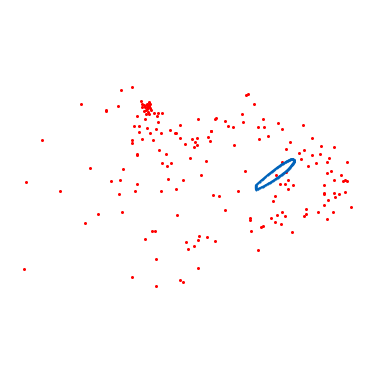

epoch 4000 : Cities and Network


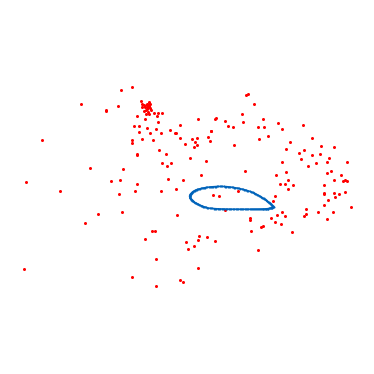

epoch 6000 : Cities and Network


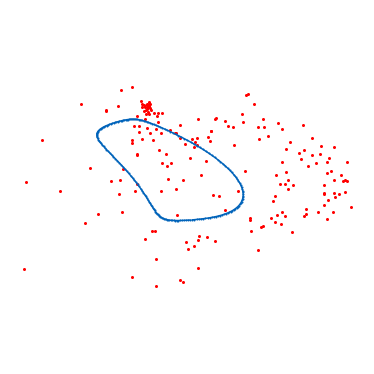

epoch 8000 : Cities and Network


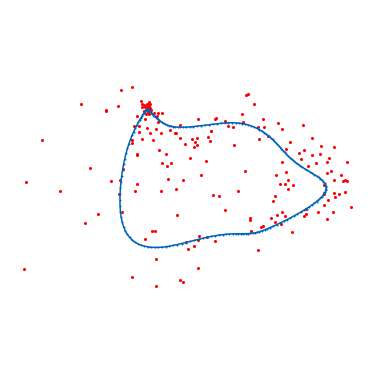

epoch 10000 : Cities and Network


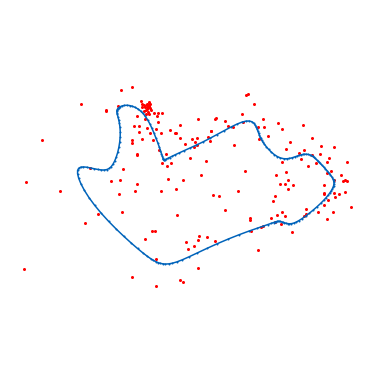

epoch 12000 : Cities and Network


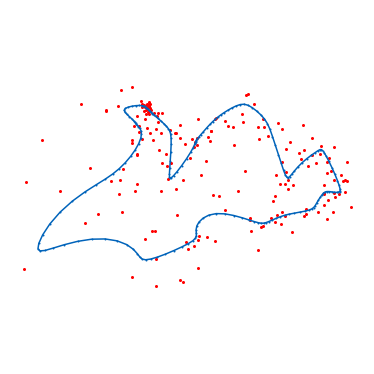

epoch 14000 : Cities and Network


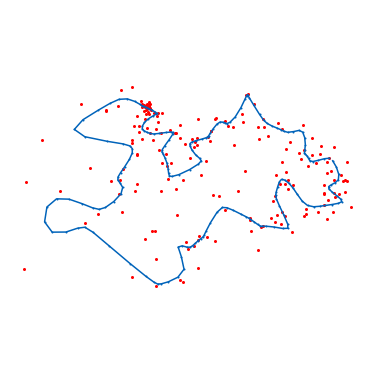

epoch 16000 : Cities and Network


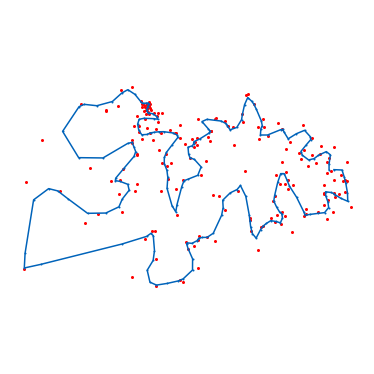

epoch 18000 : Cities and Network


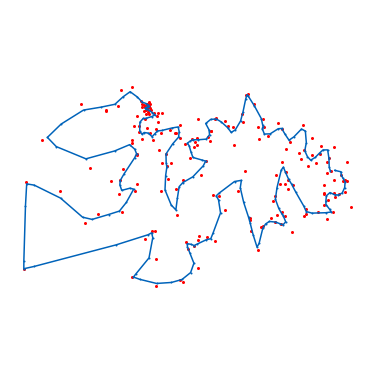

epoch 20000 : Cities and Network


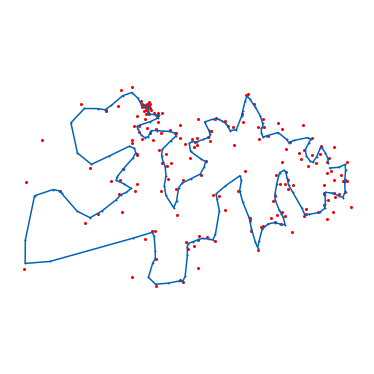

epoch 22000 : Cities and Network


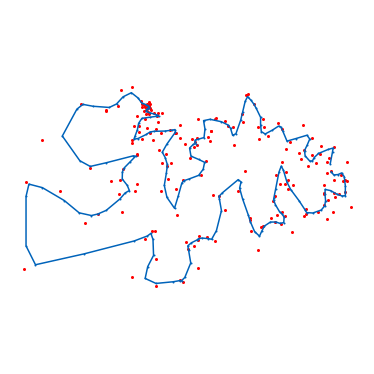

epoch 24000 : Cities and Network


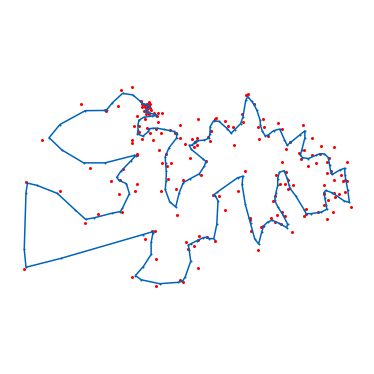

Radius has completely decayed at 24487 iterations


In [84]:
# Q3_graded
learning_rate = 0.8
radius = cities_count * 8
net = som_network(cities_count)
for i in range(30000):
  rand_city = np.random.randint(0, cities_count)
  winner = closest_neuron(net, normal_coordinates[rand_city])[0][0]
  neighbour = get_neighborhood(winner, radius // 10, cities_count)
  net += neighbour[:,np.newaxis] * learning_rate * ( normal_coordinates[rand_city] - net)
  learning_rate = learning_rate * 0.99997
  radius = radius * 0.9997

  if (i + 1) % 2000 == 0:
    print(f'epoch {i+1} : Cities and Network')
    plot_city_network(net, normal_coordinates)

  if radius < 1:
    print('Radius has completely decayed at {} iterations'.format(i))
    break

  if learning_rate < 0.001:
    print('Learning rate has completely decayed at {} iterations'.format(i))
    break

In [85]:
# Q3_graded
idx = 0
for city in normal_coordinates:
  win = closest_neuron(net , city)[0][0]
  print(f' city {idx + 1} ==> (x, y) : ({city[0]}, {city[1]}), location in tour : {win}')
  idx +=1


 city 1 ==> (x, y) : (0.0, 2.7984115875337372e-08), location in tour : 73
 city 2 ==> (x, y) : (4.028035470022631e-09, 1.6991875114721342e-07), location in tour : 76
 city 3 ==> (x, y) : (3.0104142577492063e-08, 2.3966708014153446e-07), location in tour : 96
 city 4 ==> (x, y) : (5.957226951230243e-08, 1.5582070332248925e-07), location in tour : 78
 city 5 ==> (x, y) : (9.455244297660563e-08, 2.984973632041883e-07), location in tour : 98
 city 6 ==> (x, y) : (9.98524715718145e-08, 1.0409244865576955e-07), location in tour : 80
 city 7 ==> (x, y) : (1.0780249538453852e-07, 1.9408688764699208e-07), location in tour : 94
 city 8 ==> (x, y) : (1.2190058136943847e-07, 1.1861453234906445e-07), location in tour : 81
 city 9 ==> (x, y) : (1.3419662939343738e-07, 2.8620131518019076e-07), location in tour : 100
 city 10 ==> (x, y) : (1.3546862251862362e-07, 2.881093239480587e-07), location in tour : 100
 city 11 ==> (x, y) : (1.4257065091455774e-07, 1.7235676659061899e-07), location in tour : 88

# <font color='red'>Submission</font>

1. Sign up in [Gradescope](https://www.gradescope.com) with proper name and student ID.
2. Fill in your full name (seperated by single spaces) and student ID in the beginning of this notebook.
3. After you're done with this notebook, you should do the following:
  - Clear all outputs of the notebook.
  ![clear all outputs](https://i.ibb.co/y6FrttB/Screen-Shot-2021-03-21-at-01-51-42.png)
  - Run all of the cells (if you skipped a question just leave the cell unchanged), and make sure all of your outputs are correct.
  ![run all](https://i.ibb.co/cgRcBZ0/Screen-Shot-2021-03-21-at-01-54-58.png)
  - Save your notebook.
  
  - If you're using Colab, download your notebook.
  ![download ipynb](https://i.ibb.co/2KxYM6K/Screen-Shot-2021-03-21-at-02-03-50.png)
  
  - Put the notebook file you just downloaded and `convert.py` in the same folder run the following command:
  ```bash
  python convert.py
  ```
  This will export your code for each question into a `.py` file.
    - **Note**: if you want to add more cells, add this to the **first** line of the cell:
  ```python
  # Q1_graded
  ```
  according to the question number.
  - There are 2 assignments in Gradescope:
  
    You should upload your **codes** and your **notebook** in `HW3` section and your final report for all of the questions as a **single pdf** file in `HW3 - Report`. Autograder will automatically check for:
    - `CI002_HW3.ipynb`
    - `Q2.py`
    - `Q3.py`
    - Your name and ID in the beginning of `.ipynb` file.

    It is important that you <font color='red'>**don't**</font> change the names of these files before submission.

4. If you pass the autograder, you're good to go.